### 📜 References

This notebook was completed with the help of the following resources:

- 📚 **The Book**: *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*
- 🌐 **GitHub Repository**: [Hands-On Machine Learning](https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb)
- 📖 **Official Documentation**: Python libraries used, including **scikit-learn**, **pandas**, **numpy**, and **matplotlib**.
- 🛠️ **Gen-AI Tools**: Utilized for debugging the code.


- Importing common libraries

In [1]:
from typing import List, Tuple

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

import warnings
warnings.filterwarnings('ignore')


* Loading and reading data

In [2]:
def normalize_labels(dataset: pd.DataFrame) -> pd.DataFrame:
    new_dataset = dataset.copy()
    new_dataset.columns = new_dataset.columns.str.lower()
    new_dataset.columns = new_dataset.columns.str.replace(" ", "_")
    return new_dataset

filename = "happiness_data.csv"

data = pd.read_csv(f'./{filename}')
data_normalized = normalize_labels(data)

data_normalized

country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      generosity  perceptions_of_corruption  positive_affect  negative_affect  
0          0.168                      0.882            0.518            0.258  
1          0.190                      0.850            0.584            0.237  
2          0.121                      0.707            0.618            0.275  
3          0.162                      0.731            0.611            0.267  
4          0.236                      0.776            0.710            0.268  
...          ...                        ...              ...              ...  
1944      -0.095                      0.724            0.738            0.209  
1945      -0.098                      0.751            0.806            0.224  
1946      -0.068                      0.844            0.710            0.212  
1947      -0.064                      0.831            0.716            0.235  
1948      -0.009                      0.789            0.703            0.346  

[1949 rows x 11 columns]

# EDA

In [3]:
data_normalized.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   life_ladder                       1949 non-null   float64
 3   log_gdp_per_capita                1913 non-null   float64
 4   social_support                    1936 non-null   float64
 5   healthy_life_expectancy_at_birth  1894 non-null   float64
 6   freedom_to_make_life_choices      1917 non-null   float64
 7   generosity                        1860 non-null   float64
 8   perceptions_of_corruption         1839 non-null   float64
 9   positive_affect                   1927 non-null   float64
 10  negative_affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
data_normalized.isnull().sum()

country_name                          0
year                                  0
life_ladder                           0
log_gdp_per_capita                   36
social_support                       13
healthy_life_expectancy_at_birth     55
freedom_to_make_life_choices         32
generosity                           89
perceptions_of_corruption           110
positive_affect                      22
negative_affect                      16
dtype: int64

In [5]:
def segregate_features(data : pd.DataFrame) -> Tuple[List[str], List[str]]:
    continuous_features = []
    categorical_features = []
    
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            continuous_features.append(column)
        elif pd.api.types.is_object_dtype(data[column]):
            categorical_features.append(column)
    
    return continuous_features, categorical_features

In [6]:
continuous_features, categorical_features = segregate_features(data_normalized)

In [7]:
def fill_nulls(dataset: pd.DataFrame, median = True) -> pd.DataFrame:
    new_data = dataset.copy()
    continuous_features = new_data.select_dtypes(include=["float64", "int64"])
    for column in continuous_features:
        new_data.fillna({column: new_data[column].median()}, inplace=True)
    return new_data

In [8]:
data_cleaned = fill_nulls(data_normalized, continuous_features)

In [9]:
data_cleaned.isnull().sum()

country_name                        0
year                                0
life_ladder                         0
log_gdp_per_capita                  0
social_support                      0
healthy_life_expectancy_at_birth    0
freedom_to_make_life_choices        0
generosity                          0
perceptions_of_corruption           0
positive_affect                     0
negative_affect                     0
dtype: int64

### DATA SUMMARY

Total 1949 records in the dataset.

- How much data is present?

| Attribute                                      | Number of Records |
|------------------------------------------------|--------------------|
| `country_name`                                 | 1949               |
| `year`                                         | 1949               |
| `life_ladder`                                  | 1949               |
| `log_gdp_per_capita`                          | 1913               |
| `social_support`                               | 1936               |
| `healthy_life_expectancy_at_birth`             | 1894               |
| `freedom_to_make_life_choices`                 | 1917               |
| `generosity`                                   | 1860               |
| `perceptions_of_corruption`                    | 1839               |
| `positive_affect`                              | 1927               |
| `negative_affect`                              | 1933               |

- What attributes/features are continuous valued?

The following attributes have continuous numerical values:

| Continuous Attributes                          |
|------------------------------------------------|
| `life_ladder`                                  |
| `log_gdp_per_capita`                          |
| `social_support`                               |
| `healthy_life_expectancy_at_birth`             |
| `freedom_to_make_life_choices`                 |
| `generosity`                                   |
| `perceptions_of_corruption`                    |
| `positive_affect`                              |
| `negative_affect`                              |

- Which attributes are categorical?

| Categorical Attributes                         |
|------------------------------------------------|
| `country_name`                                 |
| `year`                                         |


### Visualizations

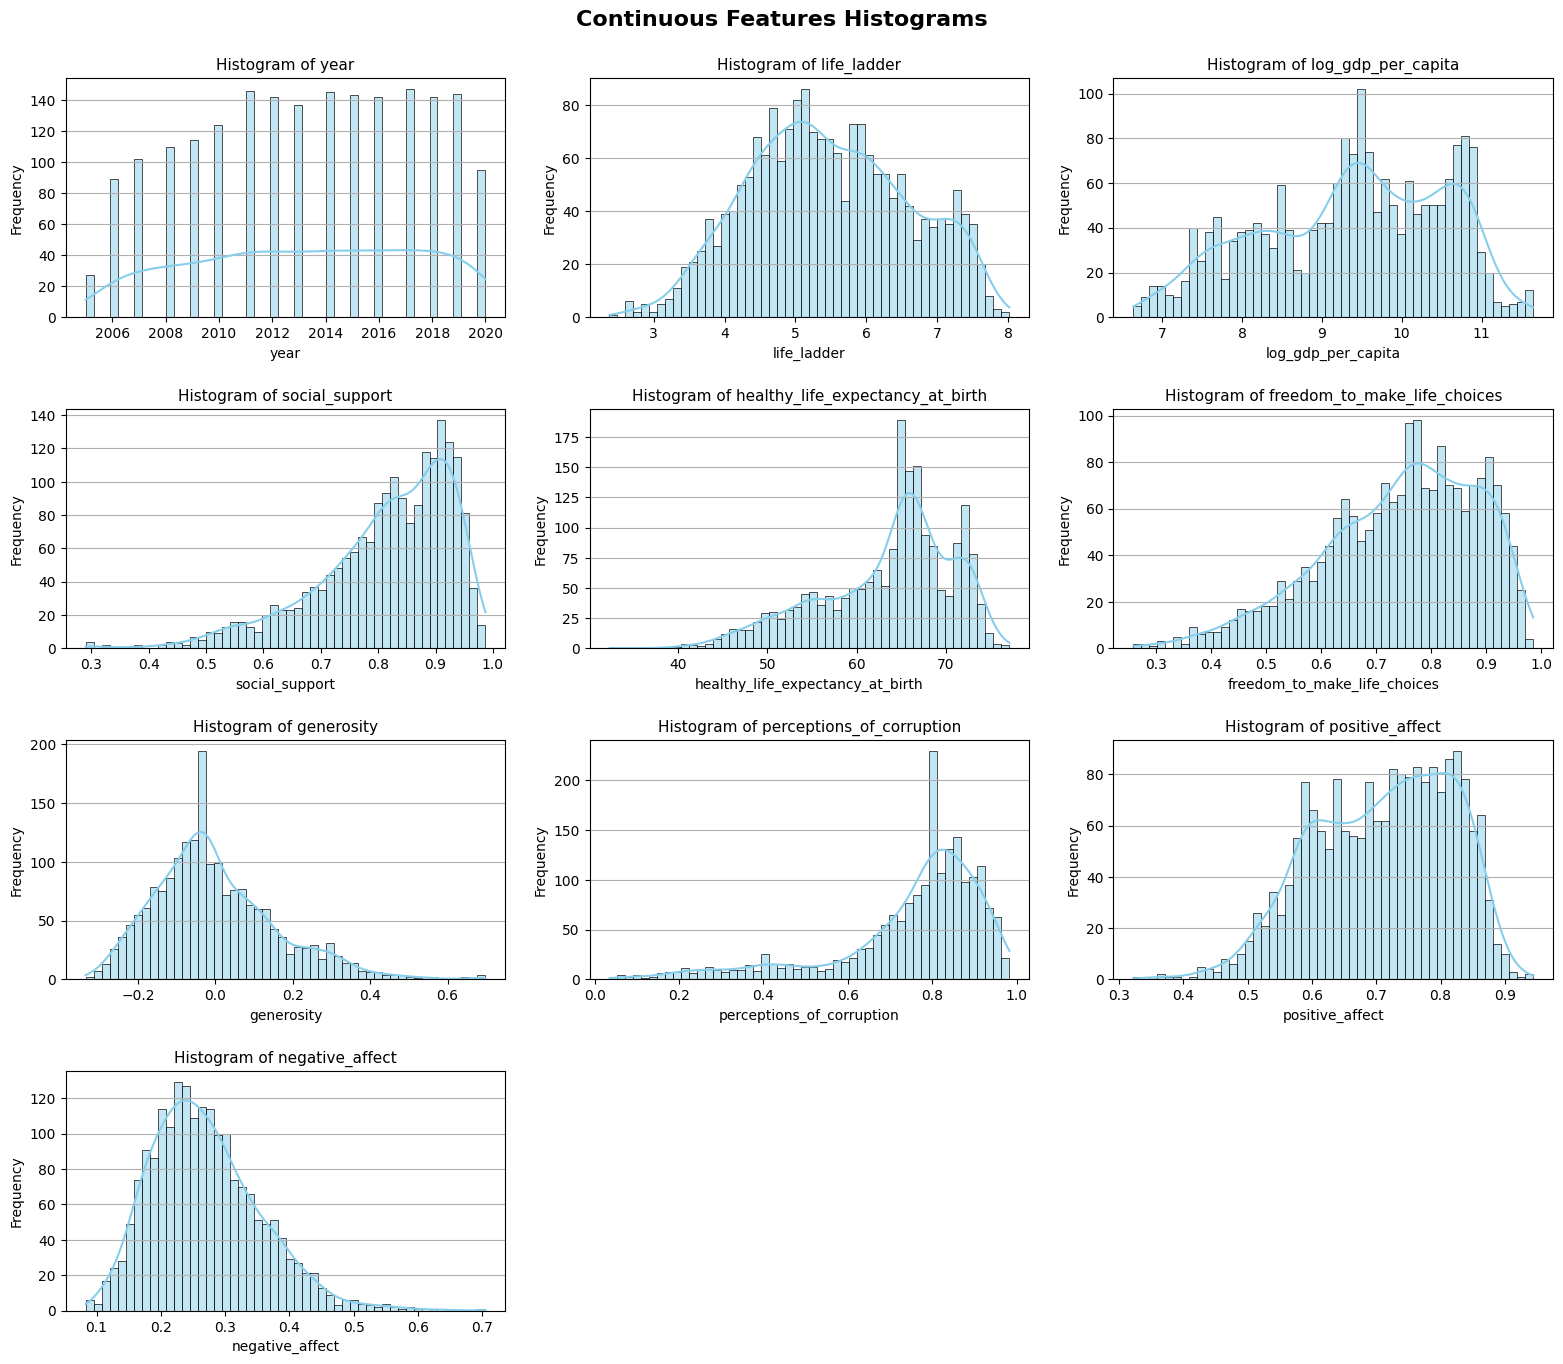

In [10]:
def plot_continuous_features_histograms(dataframe : pd.DataFrame, continuous_features : list , bin_size : int = 50) -> None:
    num_features = len(continuous_features)
    cols = 3  # Number of columns in the plot grid
    rows = (num_features // cols) + (num_features % cols > 0)  # Calculate number of rows

    plt.figure(figsize=(16, 14))  # Set the figure size
    plt.suptitle('Continuous Features Histograms', fontsize=16, weight='bold')

    for i, feature in enumerate(continuous_features):
        plt.subplot(rows, cols, i + 1)  # Create a subplot for each feature
        sns.histplot(data=dataframe, x=feature, bins=bin_size, kde=True, color='skyblue')
        plt.title(f'Histogram of {feature}', fontsize=11)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(axis='y')

    plt.tight_layout(pad=2)  # Adjust layout
    plt.show()

plot_continuous_features_histograms(data_cleaned, continuous_features)

### Feature Analysis

### Continuous Features Analysis

### 1. **Year**
   - **Distribution**: Uniformly distributed between 2006 and 2020.
   - **Skewness**: None, relatively uniform distribution.
   - **Outliers**: No significant outliers observed.
   - **Treatment**: No special treatment needed.

   ---

### 2. **Life Ladder**
   - **Distribution**: Approximately normal distribution, slightly skewed to the left.
   - **Skewness**: Slight negative skew.
   - **Outliers**: No significant outliers observed.
   - **Treatment**: May consider normalization to center the distribution better.

   ---

### 3. **Log GDP per Capita**
   - **Distribution**: Bimodal distribution with two prominent peaks.
   - **Skewness**: Slight positive skew.
   - **Outliers**: A few outliers around the lower and higher values.
   - **Treatment**: Consider log transformation if further skew needs to be corrected.

   ---

### 4. **Social Support**
   - **Distribution**: Positively skewed, with most values between 0.8 and 1.0.
   - **Skewness**: Strong positive skew.
   - **Outliers**: Potential outliers on the lower side.
   - **Treatment**: Consider normalization or transformation (e.g., square root transformation) to reduce skewness.

   ---

### 5. **Healthy Life Expectancy at Birth**
   - **Distribution**: Normal distribution with slight positive skew.
   - **Skewness**: Slight positive skew.
   - **Outliers**: No significant outliers.
   - **Treatment**: Possible scaling or normalization for uniform distribution.

   ---

### 6. **Freedom to Make Life Choices**
   - **Distribution**: Strong positive skew, with the majority of values between 0.7 and 1.0.
   - **Skewness**: Strong positive skew.
   - **Outliers**: Possible outliers at the lower end.
   - **Treatment**: Consider normalization or transformation to reduce the skew.

   ---

### 7. **Generosity**
   - **Distribution**: Negatively skewed, with most values around 0.2 to 0.4, with a sharp peak near 0.
   - **Skewness**: Strong negative skew.
   - **Outliers**: Some negative values could be considered outliers.
   - **Treatment**: Since generosity can take negative values, transformation (e.g., log transformation) should be done carefully or avoided.

   ---

### 8. **Perceptions of Corruption**
   - **Distribution**: Slight bimodal distribution, with a strong peak at around 0.7-0.9.
   - **Skewness**: Strong positive skew.
   - **Outliers**: Potential outliers at both extremes.
   - **Treatment**: Consider treating outliers and normalizing the data.

   ---

### 9. **Positive Affect**
   - **Distribution**: Relatively normal distribution with a slight positive skew.
   - **Skewness**: Slight positive skew.
   - **Outliers**: No significant outliers.
   - **Treatment**: Can be normalized if needed.

   ---

### 10. **Negative Affect**
   - **Distribution**: Positively skewed, with most values concentrated between 0.2 and 0.5.
   - **Skewness**: Positive skew.
   - **Outliers**: No significant outliers.
   - **Treatment**: Consider normalization or transformation to reduce skewness.

---

### Special Treatment Analysis
   - The dataset contains several continuous features, many of which exhibit skewness, particularly towards the positive side (e.g., **Social Support**, **Freedom to Make Life Choices**, and **Generosity**). This may necessitate transformations.
   - There are also a few columns that have possible outliers (**Log GDP per Capita**, **Perceptions of Corruption**), which may require attention, such as removing or treating the outliers based on their significance. For some columns, normalization or scaling could help in reducing the skewness and improving model performance.
   - No extreme measures are required for **Year** and **Life Ladder**, as their distributions are relatively uniform or close to normal.

In [11]:
data_cleaned.describe()

year  life_ladder  log_gdp_per_capita  social_support  \
count  1949.000000  1949.000000         1949.000000     1949.000000   
mean   2013.216008     5.466705            9.370144        0.812705   
std       4.166828     1.115711            1.143437        0.118100   
min    2005.000000     2.375000            6.635000        0.290000   
25%    2010.000000     4.640000            8.478000        0.751000   
50%    2013.000000     5.386000            9.460000        0.835500   
75%    2017.000000     6.283000           10.335000        0.905000   
max    2020.000000     8.019000           11.648000        0.987000   

       healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
count                       1949.000000                   1949.000000   
mean                          63.411316                      0.742893   
std                            7.409738                      0.140945   
min                           32.300000                      0.258000   
25%                           58.900000                      0.649000   
50%                           65.200000                      0.763000   
75%                           68.400000                      0.854000   
max                           77.100000                      0.985000   

        generosity  perceptions_of_corruption  positive_affect  \
count  1949.000000                1949.000000      1949.000000   
mean     -0.001066                   0.750222         0.710139   
std       0.158557                   0.181880         0.106501   
min      -0.335000                   0.035000         0.322000   
25%      -0.106000                   0.699000         0.627000   
50%      -0.025500                   0.802000         0.722000   
75%       0.085000                   0.868000         0.798000   
max       0.698000                   0.983000         0.944000   

       negative_affect  
count      1949.000000  
mean          0.268458  
std           0.084823  
min           0.083000  
25%           0.207000  
50%           0.258000  
75%           0.319000  
max           0.705000

### QUE [C]: Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

In [2]:
def compute_pearson_correlation(dataset: pd.DataFrame) -> pd.DataFrame:
    continuous_df = dataset.select_dtypes(include=['float64', 'int64'])
    pcc_matrix = continuous_df.corr(method='pearson')
    return pcc_matrix

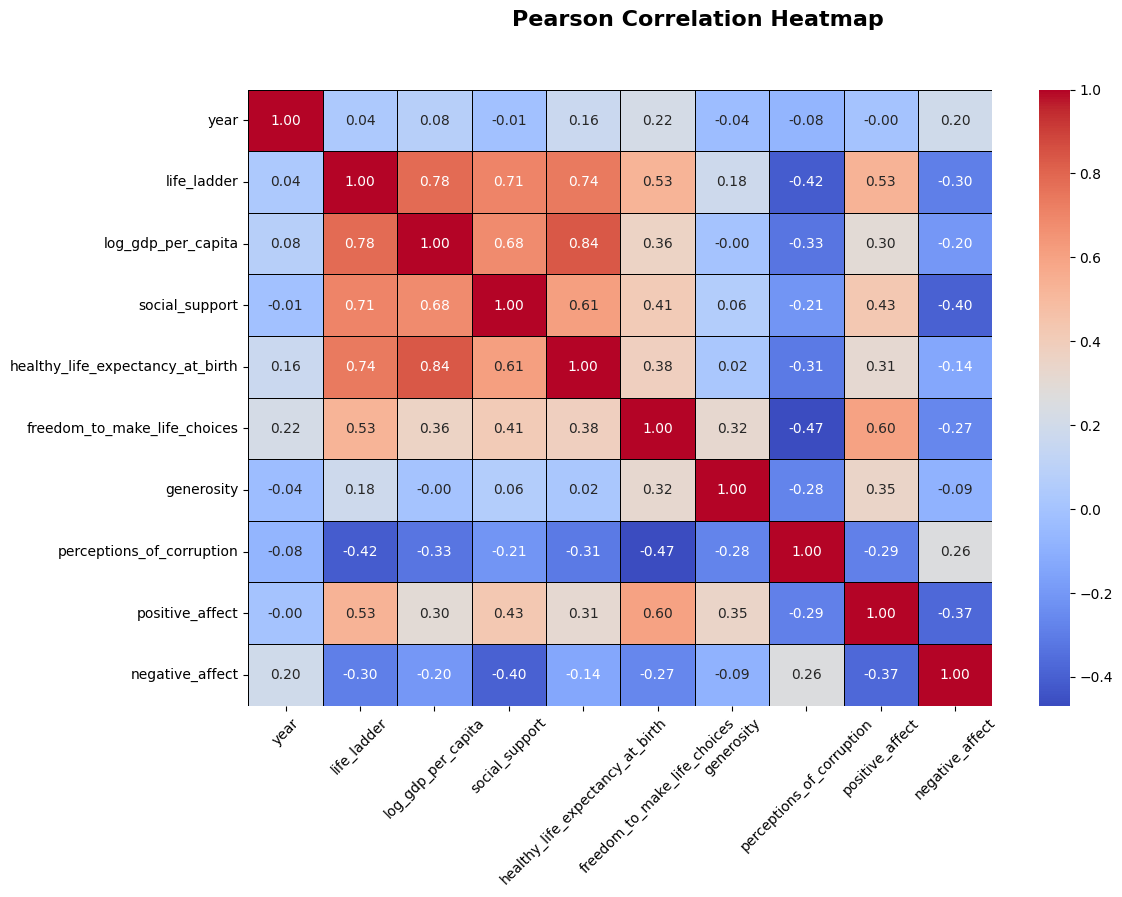

In [13]:
# computing the correlation matrix
pcc_matrix = compute_pearson_correlation(data_cleaned)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
plt.suptitle('Pearson Correlation Heatmap', fontsize=16, weight='bold')
sns.heatmap(pcc_matrix, annot = True, cmap="coolwarm", fmt='.2f', linewidths=0.5, linecolor='black')

# rotate the x and y ticks
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

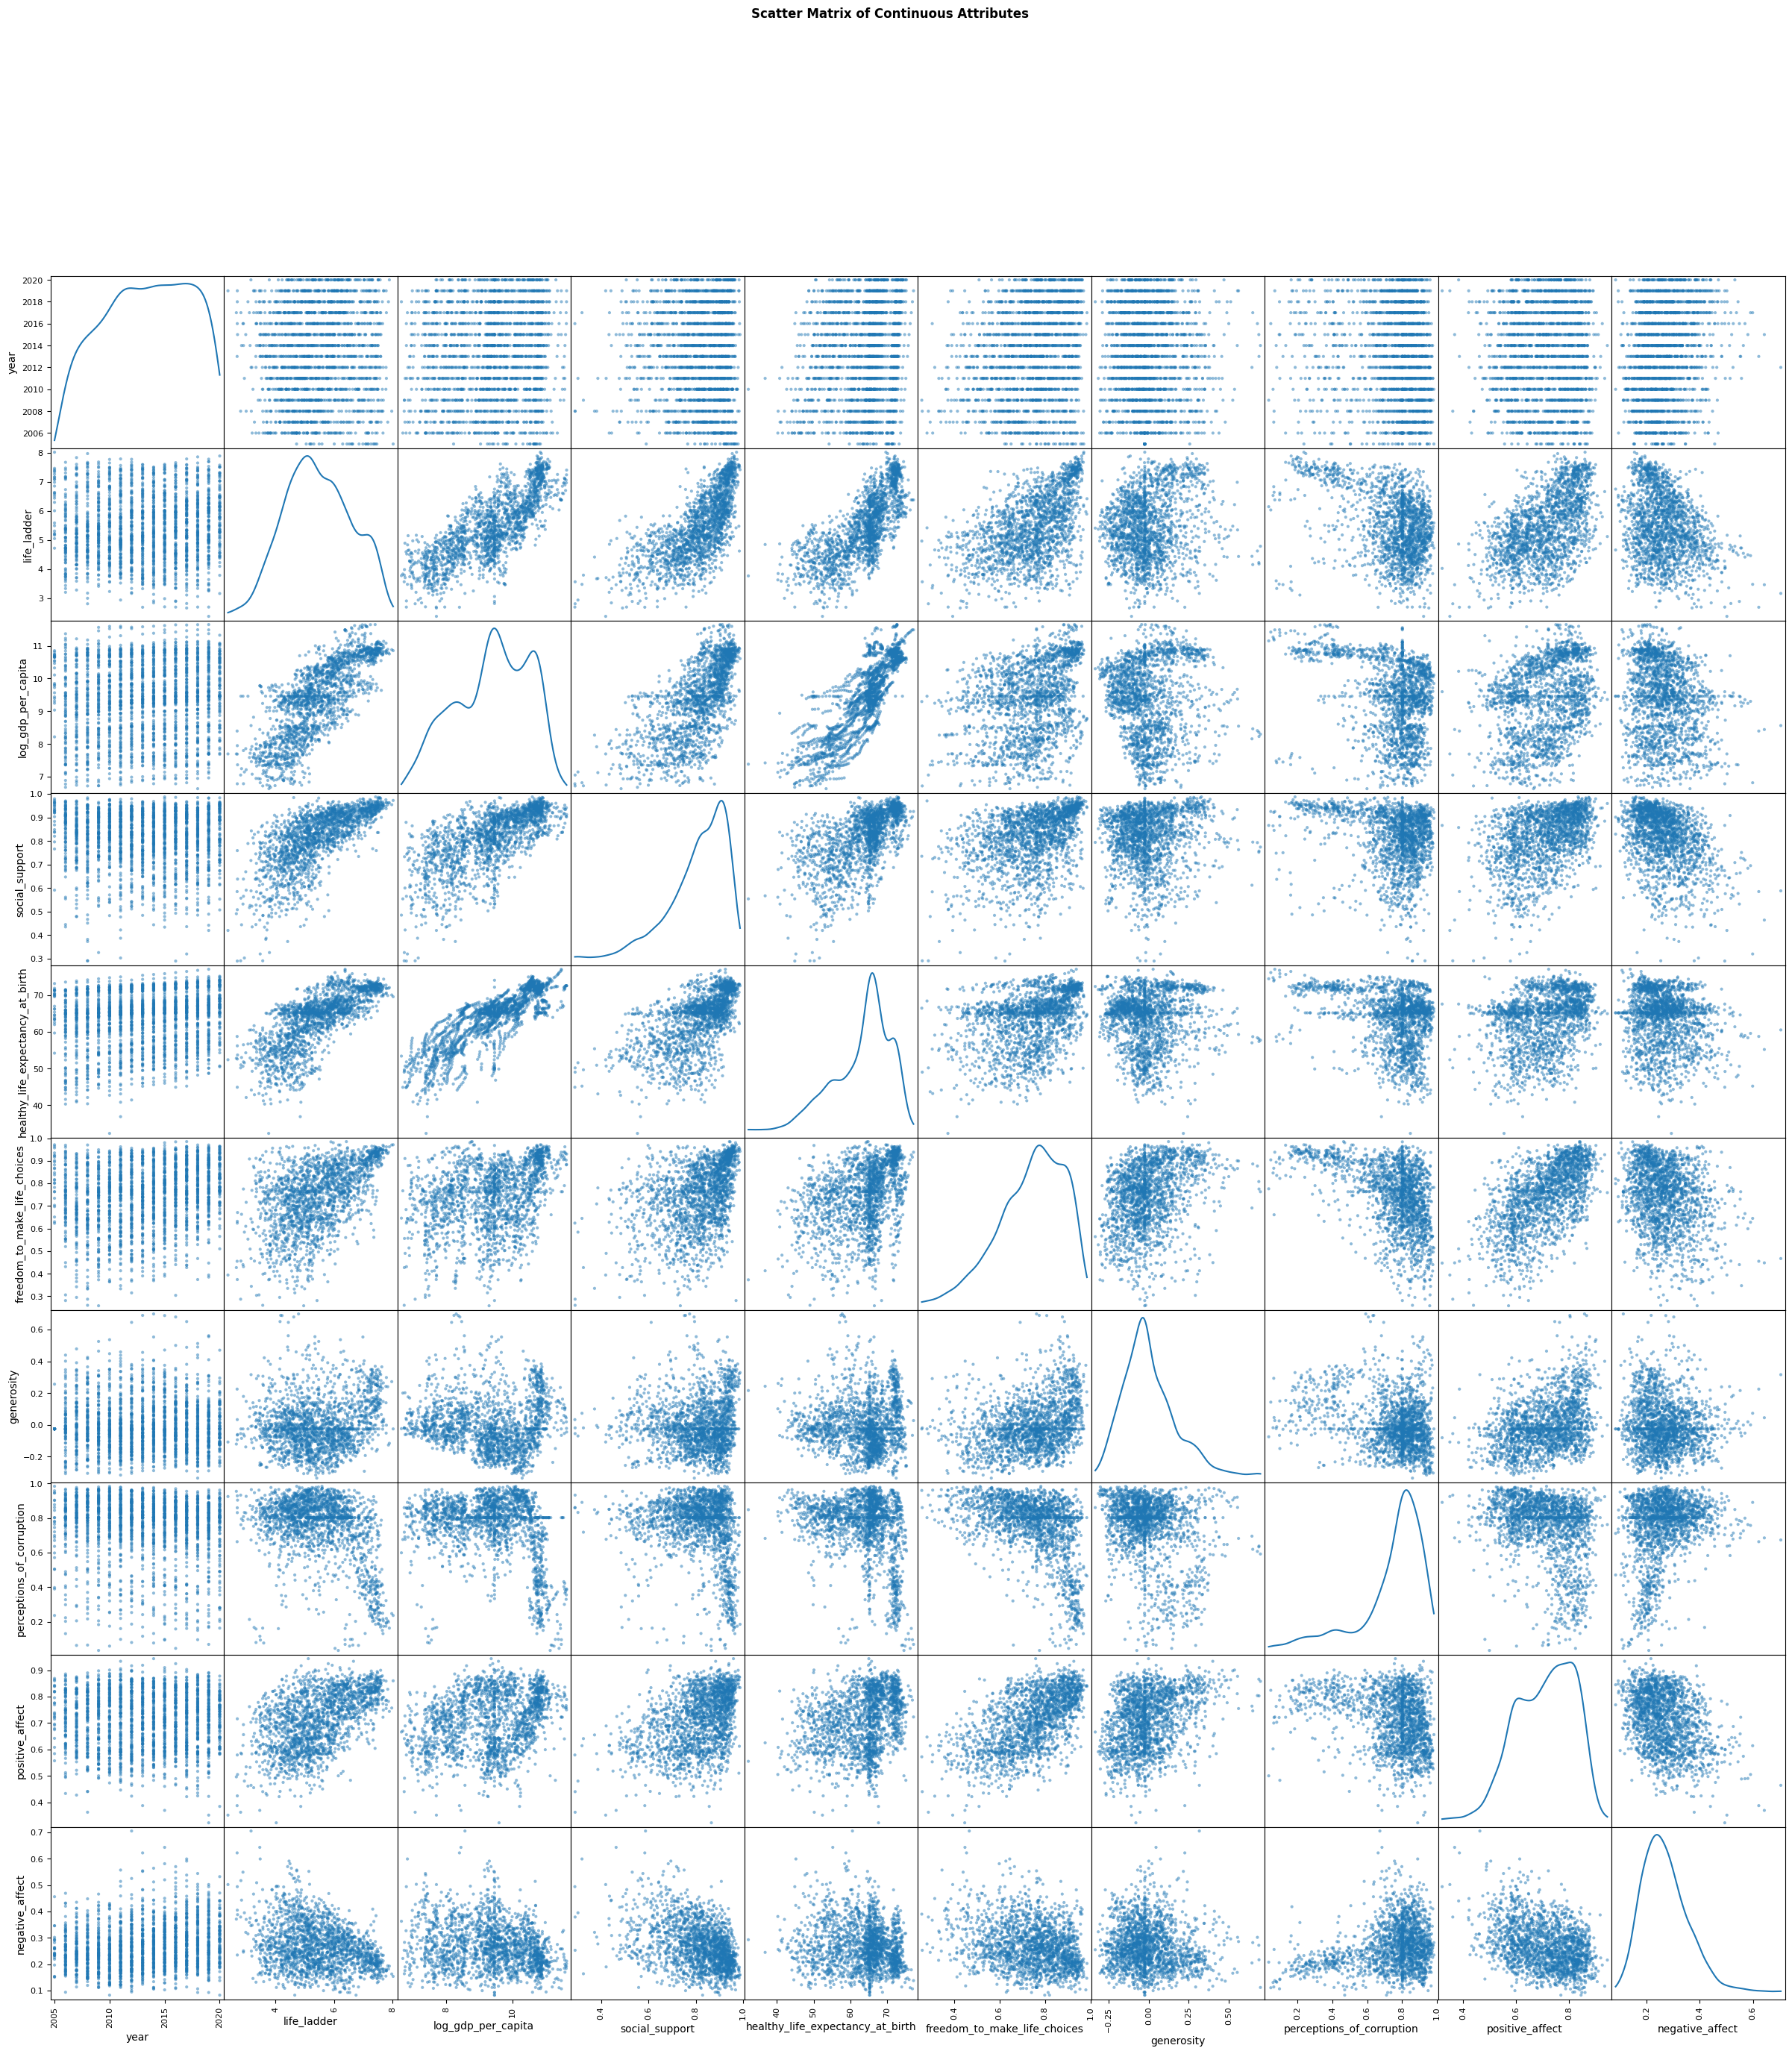

In [14]:
from pandas.plotting import scatter_matrix

def generate_scatter_matrix(df : pd.DataFrame, plot_title : str ="Scatter Matrix of Continuous Attributes") -> None:
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    scatter_matrix(df[continuous_columns], figsize=(30, 30), diagonal='kde', alpha=0.5)

    plt.suptitle(plot_title, fontsize=12, weight='bold', y=1)
    plt.show()

generate_scatter_matrix(data_cleaned)

# Notable Correlations and Relationships

### 📅 1. **Year vs Life Ladder**
- **Observation**: The data points are evenly distributed across the years, but there is no clear trend or correlation between the year and the life ladder score. This indicates that **happiness levels** do not appear to be significantly influenced by the year.

---

### 📊 2. **Life Ladder vs Life Ladder**
- **Observation**: The diagonal line is expected, as this is the plot of the variable against itself. No additional insights are derived from this plot.

---

### 💰 3. **Log GDP per Capita vs Life Ladder**
- **Observation**: There is a **positive correlation** between Log GDP per Capita and the Life Ladder score. Countries with a higher GDP per capita tend to have higher happiness scores. However, the relationship is not perfectly linear, as the data spreads out at higher GDP levels.

---

### 🤝 4. **Social Support vs Life Ladder**
- **Observation**: A **strong positive correlation** is observed between social support and life ladder scores. Countries with higher levels of social support tend to report higher happiness levels, suggesting that **community and social systems** play a key role in subjective well-being.

---

### 🌱 5. **Healthy Life Expectancy at Birth vs Life Ladder**
- **Observation**: A clear **positive correlation** is evident. Countries with higher life expectancy at birth also report higher happiness scores, implying that **longer, healthier lives** contribute to overall life satisfaction.

---

### ✨ 6. **Freedom to Make Life Choices vs Life Ladder**
- **Observation**: There is a **positive relationship** between freedom of choice and happiness levels. Individuals in countries where they feel freer to make life decisions tend to report greater levels of happiness.

---

### 🎁 7. **Generosity vs Life Ladder**
- **Observation**: There is no strong, clear correlation between generosity and life ladder scores. The data is fairly scattered, indicating that generosity alone may not be a significant factor in determining happiness.

---

### 🚫 8. **Perceptions of Corruption vs Life Ladder**
- **Observation**: There appears to be a **negative correlation** between perceptions of corruption and life ladder scores. Countries where corruption is perceived to be lower generally report higher happiness levels. This suggests that **trust in institutions** may impact subjective well-being.

---

### 😊 9. **Positive Affect vs Life Ladder**
- **Observation**: A **positive correlation** is seen between positive affect and happiness. Countries with higher positive emotional states tend to report higher life ladder scores, indicating that **positive emotions** are closely tied to overall life satisfaction.

---

### 😞 10. **Negative Affect vs Life Ladder**
- **Observation**: A **negative correlation** is observed between negative affect and life ladder scores. Higher levels of negative emotions are associated with lower happiness levels, which is expected, as **negative emotions** detract from subjective well-being.

---

### ⚠️ 11. **Attributes Requiring Special Treatment & Its Treatment**
- **Observation**: The `country_name` attribute is a **categorical feature** and will require special treatment during analysis. This will involve encoding the categorical variable to allow it to be used effectively in modeling and analysis. 
- **Treatment**: The best possible method for this attribute would be the `one-hot encoding`.

---

In summary, factors such as **GDP per capita** 💰, **social support** 🤝, **healthy life expectancy** 🌱, **freedom to make life choices** ✨, and **positive affect** 😊 show positive correlations with happiness levels. On the other hand, **perceptions of corruption** 🚫 and **negative affect** 😞 are inversely related to happiness. Notably, generosity 🎁 does not show a strong relationship with happiness, indicating that its influence may be less direct or significant.


In [15]:
def transform_continuous_to_categorical(dataset: pd.DataFrame, column: str, categories_count = 5) -> pd.DataFrame:
    new_dataset = dataset.copy()

    if column not in new_dataset.columns:
        raise ValueError(f"Column '{column}' does not exist in the new_dataset.")
    
    min_value = new_dataset[column].min()
    max_value = new_dataset[column].max()
    
    if max_value == min_value:
        raise ValueError("The minimum and maximum values are the same; cannot create bins.")
    
    bin_width = (max_value - min_value) / categories_count
    bin_edges = [min_value + i * bin_width for i in range(categories_count + 1)]
    
    labels = [f'{i+1}' for i in range(categories_count)]
    new_dataset[f'{column}_categorical'] = pd.cut(new_dataset[column], bins=bin_edges, labels=labels, include_lowest=True)

    return new_dataset


In [16]:
# transforming the log_gdp_per_capita to categorical for stratification
data_cleaned = transform_continuous_to_categorical(data_cleaned, "log_gdp_per_capita", 5)

In [17]:
data_cleaned

country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008        3.724               7.370           0.451   
1     Afghanistan  2009        4.402               7.540           0.552   
2     Afghanistan  2010        4.758               7.647           0.539   
3     Afghanistan  2011        3.832               7.620           0.521   
4     Afghanistan  2012        3.783               7.705           0.521   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016        3.735               7.984           0.768   
1945     Zimbabwe  2017        3.638               8.016           0.754   
1946     Zimbabwe  2018        3.616               8.049           0.775   
1947     Zimbabwe  2019        2.694               7.950           0.759   
1948     Zimbabwe  2020        3.160               7.829           0.717   

      healthy_life_expectancy_at_birth  freedom_to_make_life_choices  \
0                                50.80                         0.718   
1                                51.20                         0.679   
2                                51.60                         0.600   
3                                51.92                         0.496   
4                                52.24                         0.531   
...                                ...                           ...   
1944                             54.40                         0.733   
1945                             55.00                         0.753   
1946                             55.60                         0.763   
1947                             56.20                         0.632   
1948                             56.80                         0.643   

      generosity  perceptions_of_corruption  positive_affect  negative_affect  \
0          0.168                      0.882            0.518            0.258   
1          0.190                      0.850            0.584            0.237   
2          0.121                      0.707            0.618            0.275   
3          0.162                      0.731            0.611            0.267   
4          0.236                      0.776            0.710            0.268   
...          ...                        ...              ...              ...   
1944      -0.095                      0.724            0.738            0.209   
1945      -0.098                      0.751            0.806            0.224   
1946      -0.068                      0.844            0.710            0.212   
1947      -0.064                      0.831            0.716            0.235   
1948      -0.009                      0.789            0.703            0.346   

     log_gdp_per_capita_categorical  
0                                 1  
1                                 1  
2                                 2  
3                                 1  
4                                 2  
...                             ...  
1944                              2  
1945                              2  
1946                              2  
1947                              2  
1948                              2  

[1949 rows x 12 columns]

### Data Splitting

In [18]:
def generate_stratified_datasets(
    dataset: pd.DataFrame, 
    categorical_column: str, 
    n_splits: int = 10, 
    test_size: float = 0.25, 
    random_state: int = 42
) -> List[Tuple[pd.DataFrame, pd.DataFrame]]:    
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("The dataset must be a pandas DataFrame.")
    
    if categorical_column not in dataset.columns:
        raise ValueError(f"Column '{categorical_column}' does not exist in the dataset.")

    stratified_splits = []
    splitter = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=random_state)

    for train_index, test_index in splitter.split(dataset, dataset[categorical_column]):
        stratified_train_set = dataset.iloc[train_index]
        stratified_test_set = dataset.iloc[test_index]
        stratified_splits.append((stratified_train_set, stratified_test_set))

    return stratified_splits

In [19]:
stratified_dataset = generate_stratified_datasets(data_cleaned, "log_gdp_per_capita_categorical")

In [20]:
def gdp_cat_proportions(data: pd.DataFrame):
    return data["log_gdp_per_capita_categorical"].value_counts() / len(data)


train_set, test_set = train_test_split(data_cleaned, test_size=0.25, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": gdp_cat_proportions(data_cleaned),
    "Stratified %": gdp_cat_proportions(stratified_dataset[0][1]),
    "Random %": gdp_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "log_gdp_per_capita_categorical"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

Overall %  Stratified %  Random %  \
log_gdp_per_capita_categorical                                      
1                                    9.24          9.22      8.40   
2                                   19.55         19.47     19.47   
3                                   28.37         28.48     27.46   
4                                   26.42         26.43     28.89   
5                                   16.42         16.39     15.78   

                                Strat. Error %  Rand. Error %  
log_gdp_per_capita_categorical                                 
1                                        -0.15          -9.03  
2                                        -0.42          -0.42  
3                                         0.39          -3.22  
4                                         0.04           9.35  
5                                        -0.15          -3.90


## Method Used for Partitioning

We have used 25% of dataset as `test_data` and remaining 75% as `train_data` as asked in the question. The method employed for partitioning the dataset is **stratified sampling**. This approach ensures that the sample reflects the underlying distribution of a categorical variable within the dataset. The primary steps involved in this method are as follows:

1. **Categorical Conversion**: Before applying stratified sampling, a continuous column (`log_gdp_per_capita`) was converted into a categorical variable. This transformation allows us to define specific groups or strata within the dataset based on distinct intervals or categories of the continuous variable.

2. **Stratified Shuffle Split**: The `StratifiedShuffleSplit` class from the `sklearn.model_selection` module is utilized to generate multiple train-test splits. This technique maintains the same proportion of each category in both the training and test sets as found in the entire dataset. This helps to avoid any biases that may arise from random sampling, especially in datasets with imbalanced class distributions.

3. **Multiple Splits**: The function can generate multiple stratified splits (controlled by the `n_splits` parameter), allowing for a robust evaluation of model performance across different samples while ensuring that each split remains representative of the original dataset.

## Verification of Representativeness

To verify that the test portion of the dataset is representative of the entire dataset, we can compare the distributions of the categorical variable in both the training and test sets. The following steps can be taken to perform this verification:

1. **Distribution Comparison**: For each split, we can compute and visualize the distribution of the categorical variable in both the training and test sets. This can be done using bar plots or histograms to observe the proportions of each category.

2. **Statistical Tests**: We can apply statistical tests, such as the Chi-squared test, to compare the distributions of the categorical variable in the training and test datasets. If the p-value is greater than a chosen significance level (commonly 0.05), we fail to reject the null hypothesis, indicating that there is no significant difference in distributions.

3. **Aggregate Results**: After performing these comparisons across all splits, we can aggregate the results to confirm that the test sets consistently reflect the distribution of the original dataset.

### Results Comparison

Using the following code, we compared the proportions of the categorical variable (`log_gdp_per_capita_categorical`) across three different datasets: the overall dataset, the stratified sample, and the random sample.

```python
def gdp_cat_proportions(data: pd.DataFrame):
    return data["log_gdp_per_capita_categorical"].value_counts() / len(data)

train_set, test_set = train_test_split(data_cleaned, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": gdp_cat_proportions(data_cleaned),
    "Stratified %": gdp_cat_proportions(stratified_dataset[0][1]),
    "Random %": gdp_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "log_gdp_per_capita_categorical"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] / compare_props["Overall %"] - 1)
(compare_props * 100).round(2)
```

### Key Insights from the Results

| log_gdp_per_capita_categorical | Overall % | Stratified % | Random % | Strat. Error % | Rand. Error % |
|----------------------------------|-----------|---------------|----------|----------------|----------------|
| 1                                | 9.24      | 9.22          | 8.46     | -0.15          | -8.38          |
| 2                                | 19.55     | 19.47         | 19.74    | -0.42          | 1.00           |
| 3                                | 28.37     | 28.48         | 28.72    | 0.39           | 1.21           |
| 4                                | 26.42     | 26.43         | 26.15    | 0.04           | -1.02          |
| 5                                | 16.42     | 16.39         | 16.92    | -0.15          | 3.07           |

1. **Overall Proportions**: This column shows the proportion of each category in the overall dataset.

2. **Stratified Proportions**: The proportions obtained from the stratified sampling method are very close to the overall proportions, indicating that stratified sampling effectively maintained the original distribution.

3. **Random Proportions**: The proportions obtained from random sampling show larger deviations from the overall proportions in some categories, indicating potential bias.

4. **Error Metrics**:
   - **Strat. Error %**: Measures the deviation of the stratified sample's proportions from the overall proportions, showing small values that suggest good representation.
   - **Rand. Error %**: Shows larger deviations in some categories, indicating that random sampling can lead to biased samples, especially in imbalanced datasets.

### Conclusion

The results indicate that stratified sampling is more effective than random sampling in preserving the underlying distribution of the categorical variable. The close alignment of stratified proportions with the overall proportions suggests that this method reduces sampling bias, making it a better choice for ensuring representative samples, especially in datasets with imbalanced categories.

By following these steps, we can ensure that the test portions obtained from the stratified sampling method provide a reliable basis for evaluating the performance of models trained on the dataset. This approach enhances the validity of the model's predictive capabilities when applied to new, unseen data.
```

In [21]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = MinMaxScaler(feature_range=(-1, 1))
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# removing life_ladder from the continuous features
feature_to_remove = "life_ladder"
if feature_to_remove in continuous_features:
    continuous_features.remove(feature_to_remove)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, continuous_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Training different Regression Models

# Linear Regression Model

A **linear regression model** is a statistical technique used to model the relationship between a dependent variable (also called the target or response variable) and one or more independent variables (also known as features or predictors). The goal is to find a linear equation that best predicts the target variable based on the input features.

## Key Components of Linear Regression:
1. **Model Equation**:
   The basic form of a linear regression model with one feature is:
   
   \[
   y = intercept + slope \cdot x + error
   \]

   - `y`: The predicted or dependent variable.
   - `x`: The independent variable (feature).
   - `intercept`: The value of `y` when `x = 0`.
   - `slope`: The coefficient that represents the relationship between the feature `x` and the target `y`.
   - `error`: The residual or error term, which accounts for the difference between the predicted and actual value.

   For multiple features, the model generalizes to:

   \[
   y = intercept + coef_1 \cdot x_1 + coef_2 \cdot x_2 + \dots + coef_n \cdot x_n + error
   \]
   This is called **multiple linear regression**.


2. **Closed-form Solution** (Normal Equation):
   Linear regression can be solved analytically by using the **Normal Equation**. For the matrix form of the equation \( X\beta = y \), the optimal coefficients can be computed as:

   \[
   coef = (X^T X)^{-1} X^T y
   \]

   Here, `X` is the matrix of features, and `y` is the vector of target values. This is an exact solution but computationally expensive for very large datasets.

3. **Gradient Descent**:
   In cases where the dataset is large, **Gradient Descent** is often used to iteratively find the optimal coefficients by minimizing the cost function (MSE). This involves updating the coefficients in small steps, adjusting based on the gradient (slope) of the cost function.

4. **Types of Linear Regression**:
   - **Simple Linear Regression**: One independent variable.
   - **Multiple Linear Regression**: Multiple independent variables.
   - **Regularized Linear Models**:
     - **Ridge Regression**: Adds an \( L_2 \) penalty to the cost function to prevent overfitting by shrinking coefficients.
     - **Lasso Regression**: Adds an \( L_1 \) penalty, which can shrink some coefficients to zero, effectively performing feature selection.

5. **Performance Metrics**:
   After training, a linear regression model can be evaluated using metrics such as:
   - **Mean Squared Error (MSE)**: Average squared difference between the actual and predicted values.
   - **Mean Absolute Error (MAE)**: Average absolute difference between actual and predicted values.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

strat_set_mean_cv_scores = []
strat_set_test_mses = []


for index, dataset in enumerate(stratified_dataset):
    stratified_train_dataset, stratified_test_dataset = dataset

    happiness = stratified_train_dataset.drop(["life_ladder", "log_gdp_per_capita_categorical"], axis=1) # X_train
    happiness_labels = stratified_train_dataset["life_ladder"].copy() # y_train

    happiness_test = stratified_test_dataset.drop(["life_ladder", "log_gdp_per_capita_categorical"], axis=1) # X_test
    happiness_labels_test = stratified_test_dataset["life_ladder"].copy() # y_t

    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', LinearRegression())])

    # Cross-validation
    cv_scores = cross_val_score(model_pipeline, happiness, happiness_labels, cv=3, scoring='neg_mean_squared_error')
    mean_cv_score = -cv_scores.mean()

    # Train the model
    model_pipeline.fit(happiness, happiness_labels)

    # Evaluate on test set
    happiness_pred = model_pipeline.predict(happiness)
    test_mse = mean_squared_error(happiness_labels, happiness_pred)

    print(f'========================= STRAT SET {index}=======================')
    print(f"Mean CV MSE: {mean_cv_score}")
    print(f"Train MSE: {test_mse}")

    strat_set_mean_cv_scores.append(mean_cv_score)
    strat_set_test_mses.append(test_mse)

best_model_index = strat_set_mean_cv_scores.index(min(strat_set_mean_cv_scores))

print(f'===================== BEST MODEL SET {best_model_index} =====================')
print(f"Mean CV MSE: {strat_set_mean_cv_scores[best_model_index]}")
print(f"Train MSE: {strat_set_test_mses[best_model_index]}")


========================= STRAT SET 0=======================
Mean CV MSE: 0.1726836970676031
Train MSE: 0.112944982487419
========================= STRAT SET 1=======================
Mean CV MSE: 0.1648703423936723
Train MSE: 0.113776160125131
========================= STRAT SET 2=======================
Mean CV MSE: 0.16514021837698067
Train MSE: 0.11171387541700063
========================= STRAT SET 3=======================
Mean CV MSE: 0.1722145524744307
Train MSE: 0.11553355074512335
========================= STRAT SET 4=======================
Mean CV MSE: 0.16842194147526102
Train MSE: 0.11493909308672885
========================= STRAT SET 5=======================
Mean CV MSE: 0.1688595042089491
Train MSE: 0.11600408130935963
========================= STRAT SET 6=======================
Mean CV MSE: 0.16809352658263443
Train MSE: 0.11665426293653144
========================= STRAT SET 7=======================
Mean CV MSE: 0.15980301362089058
Train MSE: 0.10995093152408922
========

In [23]:
stratified_train_dataset, stratified_test_dataset = stratified_dataset[best_model_index]

NameError: name 'stratified_dataset' is not defined

In [24]:
happiness = stratified_train_dataset.drop(["life_ladder", "log_gdp_per_capita_categorical"], axis=1) # X_train
happiness_labels = stratified_train_dataset["life_ladder"].copy() # y_train

happiness_test = stratified_test_dataset.drop(["life_ladder", "log_gdp_per_capita_categorical"], axis=1) # X_test
happiness_test_labels = stratified_test_dataset["life_ladder"].copy() # y_test

In [25]:
def root_mean_squared_error(X: object , y : object) -> object:
    return np.sqrt(mean_squared_error(X, y))

X_test = stratified_test_dataset.drop(["life_ladder"], axis=1)
y_test = stratified_test_dataset["life_ladder"].copy()
final_predictions = model_pipeline.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)
print(f"RMSE on Test Set: {final_rmse}")

RMSE on Test Set: 0.3419611121458995


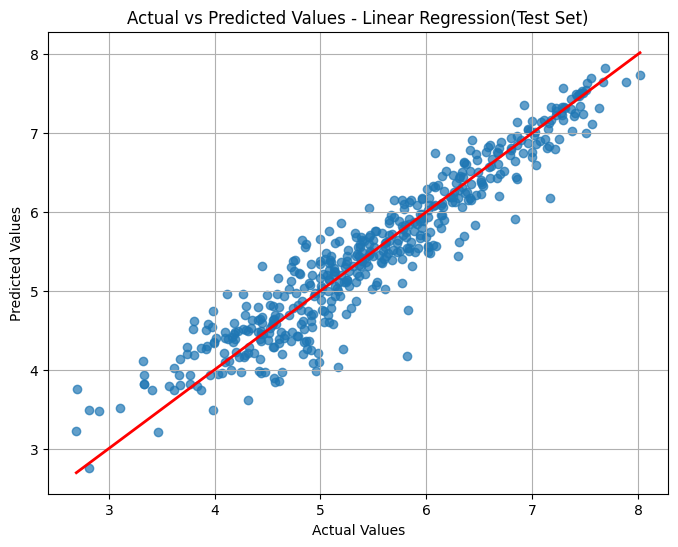

In [26]:
# Plot Actual vs Predicted values (Test set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Values - Linear Regression(Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

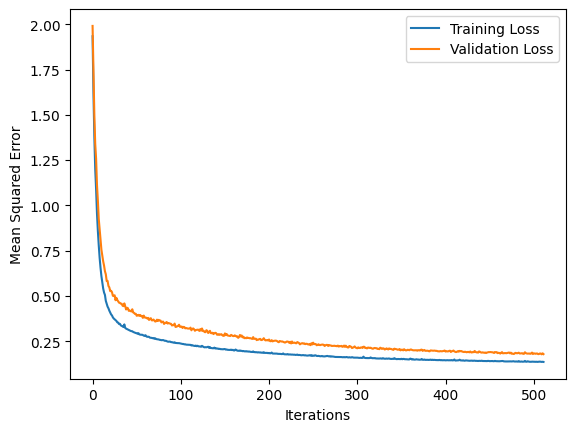

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(happiness)
y_train_transformed = happiness_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(happiness_test)
y_test_transformed = happiness_test_labels

# Initialize SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, penalty='l2', eta0=0.01, learning_rate='constant')

# Initialize losses
train_losses = []
val_losses = []

# Incremental training
for i in range(512):
    sgd_model.partial_fit(X_train_transformed, y_train_transformed)
    
    # Predictions
    train_pred = sgd_model.predict(X_train_transformed)
    val_pred = sgd_model.predict(X_test_transformed)

    # Calculate and store losses
    train_losses.append(mean_squared_error(y_train_transformed, train_pred))
    val_losses.append(mean_squared_error(y_test_transformed, val_pred))

# Plot training and validation loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()

In [28]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

alphas = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:

    print(f"==========================ALPHA : {alpha}=======================================================")
    ridge = Pipeline(steps=[('preprocessor', preprocessor), ('model', Ridge(alpha=alpha))])
    lasso = Pipeline(steps=[('preprocessor', preprocessor), ('model', Lasso(alpha=alpha))])
    elastic = Pipeline(steps=[('preprocessor', preprocessor), ('model', ElasticNet(alpha=alpha, l1_ratio=0.5))])

    for name, model in [('Ridge', ridge), ('Lasso', lasso), ('Elastic Net', elastic)]:
        cv_scores = cross_val_score(model, happiness, happiness_labels, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()
        print(f"{name} (alpha={alpha}): Mean CV MSE: {mean_cv_score}")

        if name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif name == 'Elastic Net':
            elastic_mse.append(mean_cv_score)

print(f"=============================================================================================")

==========================ALPHA : 0.1=======================================================
Ridge (alpha=0.1): Mean CV MSE: 0.15664251592858722
Lasso (alpha=0.1): Mean CV MSE: 0.44825950872629955
Elastic Net (alpha=0.1): Mean CV MSE: 0.3719719233205003
==========================ALPHA : 0.5=======================================================
Ridge (alpha=0.5): Mean CV MSE: 0.1562761926955231
Lasso (alpha=0.5): Mean CV MSE: 1.2788343887305398
Elastic Net (alpha=0.5): Mean CV MSE: 0.9988573803719477
==========================ALPHA : 1.0=======================================================
Ridge (alpha=1.0): Mean CV MSE: 0.15756153279751536
Lasso (alpha=1.0): Mean CV MSE: 1.2788343887305398
Elastic Net (alpha=1.0): Mean CV MSE: 1.2788343887305398
==========================ALPHA : 2.0=======================================================
Ridge (alpha=2.0): Mean CV MSE: 0.16305128590547502
Lasso (alpha=2.0): Mean CV MSE: 1.2788343887305398
Elastic Net (alpha=2.0): Mean CV MSE: 1.27883

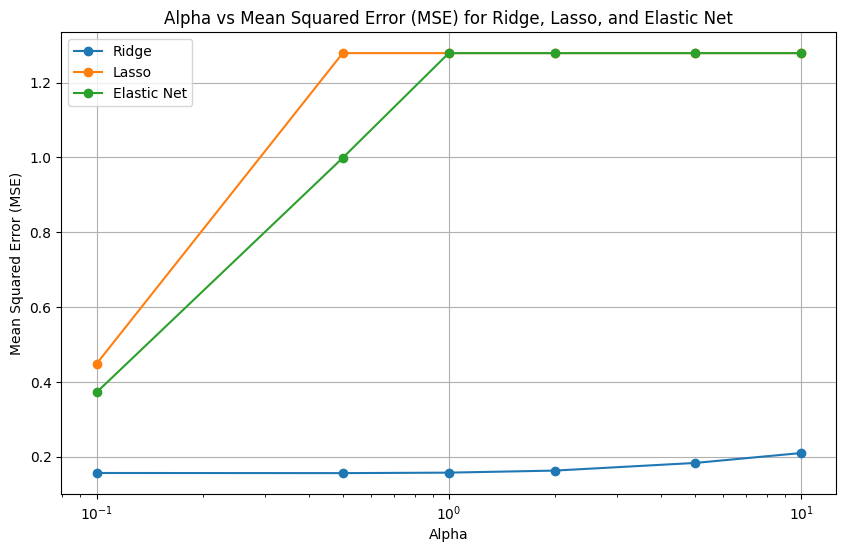

In [29]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error

# Fit the model on training data
model_pipeline.fit(happiness, happiness_labels)

# Predictions on training set
happiness_train_pred = model_pipeline.predict(happiness)
train_mse = mean_squared_error(happiness_labels, happiness_train_pred)

# Predictions on test set
final_predictions = model_pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, final_predictions)

# Calculate RMSE
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

# Check for overfitting or underfitting
if train_rmse < test_rmse:
    print("Potential overfitting: The model performs better on the training set than the test set.")
elif train_rmse > test_rmse:
    print("Potential underfitting: The model performs better on the test set than the training set.")
else:
    print("The model seems to be well-fit, with similar performance on both sets.")


Train RMSE: 0.33887747735551066
Test RMSE: 0.3806140344952941
Potential overfitting: The model performs better on the training set than the test set.


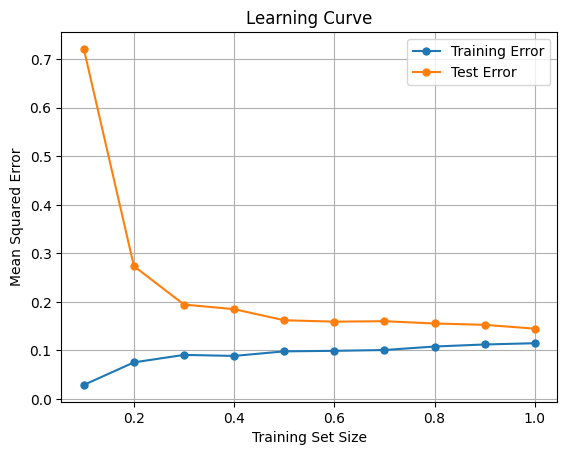

In [31]:
# Learning curve to check for overfitting/underfitting
train_sizes = [i/10 for i in range(1, 11)]
train_errors = []
test_errors = []

for train_size in train_sizes:
    model_pipeline.fit(happiness[:int(train_size * len(happiness))], happiness_labels[:int(train_size * len(happiness_labels))])

    train_pred = model_pipeline.predict(happiness[:int(train_size * len(happiness))])
    test_pred = model_pipeline.predict(X_test)

    train_errors.append(mean_squared_error(happiness_labels[:int(train_size * len(happiness_labels))], train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot learning curve
plt.plot(train_sizes, train_errors, label='Training Error', marker='o', markersize=5)
plt.plot(train_sizes, test_errors, label='Test Error', marker='o', markersize=5)
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(happiness)
X_train_transformed = pd.DataFrame(X_train_transformed.toarray())
y_train_transformed = happiness_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(happiness_test)
X_test_transformed = pd.DataFrame(X_test_transformed.toarray())
y_test_transformed = happiness_test_labels

In [33]:
type(X_train_transformed), type(y_train_transformed)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

* HyperParameter Tuning

In [60]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools

# Define the parameter grid without batch_size
param_grid = {
    'n_epochs': [50, 100, 200, 500, 1000, 2000, 5000],  # Number of epochs
    #'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Learning rates
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],  # Regularization strength
    'learning_rate_val': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],  # initial learning rate
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))
#print(param_combinations)

# Function to train model
def train_model(X, y, n_epochs, learning_rate_val, eta0, alpha):
    model = SGDRegressor(max_iter=n_epochs, learning_rate=learning_rate_val, eta0=eta0, alpha=alpha, random_state=42)
    model.fit(X, y)
    return model

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store best model and score
best_score = float('inf')
best_params = None

# Iterate through all parameter combinations
for params in param_combinations:
    n_epochs, alpha, learning_rate_val, eta0 = params
    
    # Perform k-fold cross-validation
    cv_scores = []
    for train_index, val_index in kf.split(happiness):
        X_train_fold, X_val_fold = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
        y_train_fold, y_val_fold = y_train_transformed.iloc[train_index], y_train_transformed.iloc[val_index]
        
        # Train the model
        model = train_model(X_train_fold, y_train_fold, n_epochs, learning_rate_val, eta0, alpha)
        
        # Evaluate the model
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        cv_scores.append(mse)
    
    # Calculate average MSE across all folds
    avg_mse = np.mean(cv_scores)
    
    # Update best model if current model performs better
    if avg_mse < best_score:
        best_score = avg_mse
        best_params = {
            'n_epochs': n_epochs,
            'learning_rate': learning_rate_val,
            'alpha': alpha,
            'eta0' : eta0
        }

print("Best parameters:", best_params)
print("Best MSE:", best_score)

Best parameters: {'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.001, 'eta0': 0.1}
Best MSE: 0.15741667688221672


In [34]:
# Function to plot actual vs predicted values
def plot_real_vs_predicted(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.show()

# Function to plot training vs validation loss for SGD
def plot_loss(epochs, train_loss, val_loss):
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

POLYNOMIAL FEATURES

# Polynomial Regression Model

A **polynomial regression model** is an extension of linear regression that models the relationship between a dependent variable (target) and one or more independent variables (features) as an \( n \)-degree polynomial. Unlike linear regression, where the relationship between the variables is assumed to be linear, polynomial regression can capture non-linear relationships by adding powers of the independent variables.

## Key Components of Polynomial Regression:
 **Model Equation**:
   The basic form of a polynomial regression model for a single feature is:

   \[
   y = intercept + coef_1 \cdot x + coef_2 \cdot x^2 + \dots + coef_n \cdot x^n + error
   \]

   - `y`: The predicted or dependent variable.
   - `x`: The independent variable (feature).
   - `intercept`: The value of `y` when `x = 0`.
   - `coef_1`, `coef_2`, ..., `coef_n`: Coefficients corresponding to the powers of `x`.
   - `x^2`, `x^3`, ..., `x^n`: Higher-order terms, representing non-linear effects.
   - `error`: The residual term that captures the difference between the predicted and actual value.

   For multiple features, the model generalizes to:

   \[
   y = intercept + coef_1 \cdot x_1 + coef_2 \cdot x_2 + \dots + coef_n \cdot x_n + coef_{11} \cdot x_1^2 + coef_{12} \cdot x_1 x_2 + \dots + error
   \]

   This is known as **multivariate polynomial regression**.


In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Degree of the polynomial
degree = 3

X_train = happiness
y_train = happiness_labels
X_val = happiness_test
y_val = happiness_labels_test

# Poly Pipeline
poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures(degree=degree)),
    ('model', LinearRegression())
])

# Cross-validation
cv_scores = cross_val_score(poly_model_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Train the model
poly_model_pipeline.fit(X_train, y_train)

# Evaluate on validation set
val_pred = poly_model_pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)


print(f"Mean CV MSE: {mean_cv_score}")
print(f"Validation MSE: {val_mse}")

Mean CV MSE: 0.2927301280537095
Validation MSE: 2.721566189586728


In [36]:
# Function to plot actual vs predicted values
def plot_real_vs_predicted(y_true, y_pred, title):
    plt.scatter(y_true, y_pred)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linewidth=2)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title(title)
    plt.show()

# Function to plot training vs validation loss for SGD
def plot_loss(epochs, train_loss, val_loss):
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

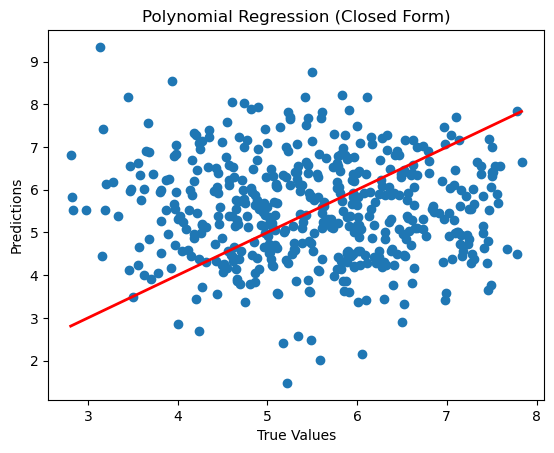

In [37]:
# for degree 3
plot_real_vs_predicted(y_val, val_pred, "Polynomial Regression (Closed Form)")

In [38]:
# Poly Pipeline
poly_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Cross-validation
cv_scores = cross_val_score(poly_model_pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()

# Train the model
poly_model_pipeline.fit(X_train, y_train)

# Evaluate on validation set
val_pred = poly_model_pipeline.predict(X_val)
val_mse = mean_squared_error(y_val, val_pred)

# # Plot actual vs predicted values
# plot_real_vs_predicted(y_val, val_pred, "Polynomial Regression (Closed Form)")

print(f"Mean CV MSE: {mean_cv_score}")
print(f"Validation MSE: {val_mse}")


Mean CV MSE: 2.0599086740190358
Validation MSE: 5.811782110562395


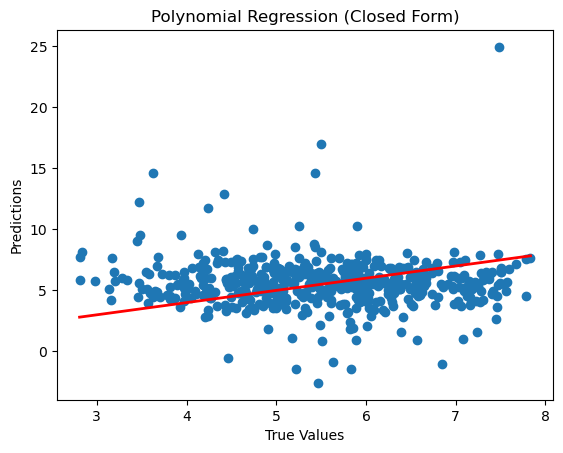

In [39]:
# for degree 2

plot_real_vs_predicted(y_val, val_pred, "Polynomial Regression (Closed Form)")

For degree 3

In [74]:
# Ridge, Lasso, and ElasticNet regularization
alphas = [0.1, 0.5, 1, 5, 10]  # Different penalty values for regularization

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:
    print(f"=================================ALPHA: {alpha}========================================================")
    for model_name, model in [('Ridge', Ridge(alpha=alpha)),
                              ('Lasso', Lasso(alpha=alpha)),
                              ('ElasticNet', ElasticNet(alpha=alpha))]:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('polynomial_features', PolynomialFeatures(degree=3)),
            ('model', model)
        ])

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()

        # Train and evaluate the model
        pipeline.fit(X_train, y_train)
        val_pred = pipeline.predict(X_val)
        val_mse = mean_squared_error(y_val, val_pred)

        # Print results of actual vs predicted
        print(f"{model_name} (alpha={alpha}) Mean CV MSE: {mean_cv_score}")
        print(f"{model_name} (alpha={alpha}) Validation MSE: {val_mse}")

        if model_name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif model_name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif model_name == 'ElasticNet':
            elastic_mse.append(mean_cv_score)

print(f"===================================================================================================")

=================================ALPHA: 0.1========================================================
Ridge (alpha=0.1) Mean CV MSE: 0.171338856883544
Ridge (alpha=0.1) Validation MSE: 2.50139845641218
Lasso (alpha=0.1) Mean CV MSE: 0.44825950872629955
Lasso (alpha=0.1) Validation MSE: 1.7227356769996787
ElasticNet (alpha=0.1) Mean CV MSE: 0.347213974667121
ElasticNet (alpha=0.1) Validation MSE: 1.7949012626340162
=================================ALPHA: 0.5========================================================
Ridge (alpha=0.5) Mean CV MSE: 0.13550352472575847
Ridge (alpha=0.5) Validation MSE: 2.4651340066441185
Lasso (alpha=0.5) Mean CV MSE: 1.2788343887305398
Lasso (alpha=0.5) Validation MSE: 1.234771442827218
ElasticNet (alpha=0.5) Mean CV MSE: 0.9988573803719477
ElasticNet (alpha=0.5) Validation MSE: 1.2744275242969936
=================================ALPHA: 1========================================================
Ridge (alpha=1) Mean CV MSE: 0.12709034190745244
Ridge (alpha=1) Va

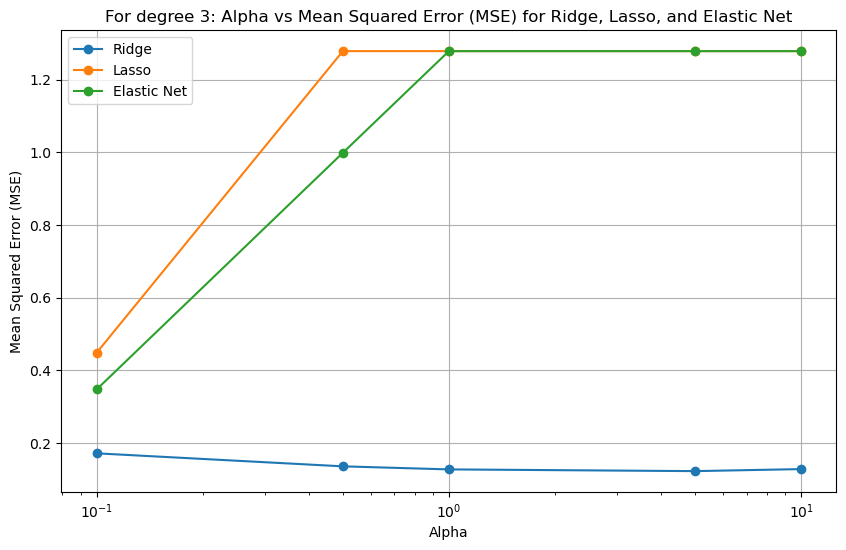

In [76]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('For degree 3: Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

For degree 2.

In [40]:
# Ridge, Lasso, and ElasticNet regularization
alphas = [0.1, 0.5, 1, 5, 10]  # Different penalty values for regularization

ridge_mse = []
lasso_mse = []
elastic_mse = []

for alpha in alphas:
    print(f"=================================ALPHA: {alpha}========================================================")
    for model_name, model in [('Ridge', Ridge(alpha=alpha)),
                              ('Lasso', Lasso(alpha=alpha)),
                              ('ElasticNet', ElasticNet(alpha=alpha))]:
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('polynomial_features', PolynomialFeatures(degree=2)),
            ('model', model)
        ])

        # Cross-validation
        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
        mean_cv_score = -cv_scores.mean()

        # Train and evaluate the model
        pipeline.fit(X_train, y_train)
        val_pred = pipeline.predict(X_val)
        val_mse = mean_squared_error(y_val, val_pred)

        # Print results of actual vs predicted
        print(f"{model_name} (alpha={alpha}) Mean CV MSE: {mean_cv_score}")
        print(f"{model_name} (alpha={alpha}) Validation MSE: {val_mse}")

        if model_name == 'Ridge':
            ridge_mse.append(mean_cv_score)
        elif model_name == 'Lasso':
            lasso_mse.append(mean_cv_score)
        elif model_name == 'ElasticNet':
            elastic_mse.append(mean_cv_score)

print(f"===================================================================================================")

=================================ALPHA: 0.1========================================================
Ridge (alpha=0.1) Mean CV MSE: 0.14896287564739155
Ridge (alpha=0.1) Validation MSE: 2.4890517903311236
Lasso (alpha=0.1) Mean CV MSE: 0.44825950872629955
Lasso (alpha=0.1) Validation MSE: 1.7227356769996787
ElasticNet (alpha=0.1) Mean CV MSE: 0.3494055526253068
ElasticNet (alpha=0.1) Validation MSE: 1.7909350142078893
=================================ALPHA: 0.5========================================================
Ridge (alpha=0.5) Mean CV MSE: 0.1268591264494902
Ridge (alpha=0.5) Validation MSE: 2.440932605535267
Lasso (alpha=0.5) Mean CV MSE: 1.2788343887305398
Lasso (alpha=0.5) Validation MSE: 1.234771442827218
ElasticNet (alpha=0.5) Mean CV MSE: 0.9988573803719477
ElasticNet (alpha=0.5) Validation MSE: 1.2744275242969936
=================================ALPHA: 1========================================================
Ridge (alpha=1) Mean CV MSE: 0.12437014501240294
Ridge (alpha=1)

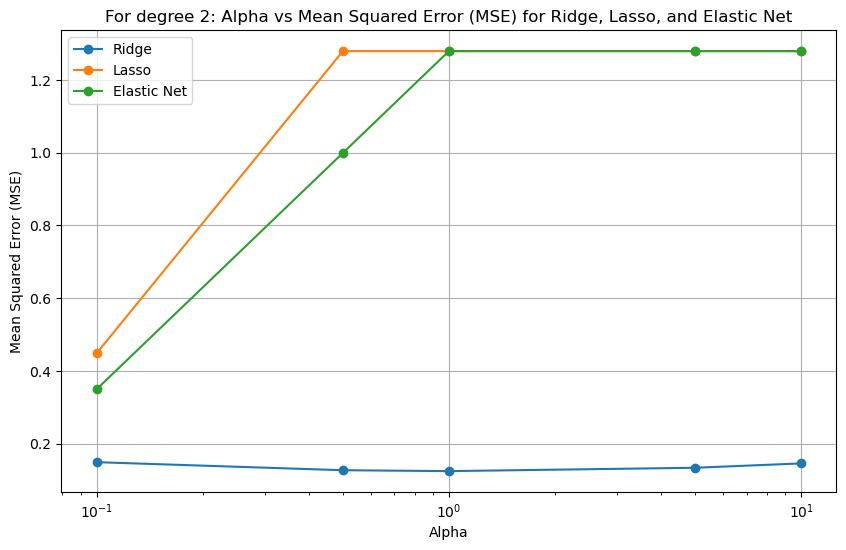

In [73]:
# Plot Alpha vs MSE for Ridge, Lasso, and Elastic Net
plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_mse, label='Ridge', marker='o')
plt.plot(alphas, lasso_mse, label='Lasso', marker='o')
plt.plot(alphas, elastic_mse, label='Elastic Net', marker='o')

# Adding labels and title
plt.xscale('log')  # Use logarithmic scale for alpha
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('For degree 2: Alpha vs Mean Squared Error (MSE) for Ridge, Lasso, and Elastic Net')
plt.legend()
plt.grid(True)
plt.show()

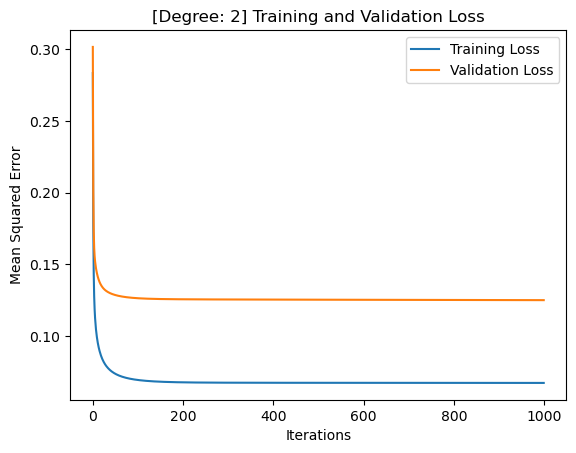

In [62]:
degree = 2

from sklearn.pipeline import make_pipeline
# Fit the preprocessor and transform the training data
X_train_transformed = preprocessor.fit_transform(happiness)
y_train_transformed = happiness_labels  # Use labels directly

# Transform the test data
X_test_transformed = preprocessor.transform(happiness_test)
y_test_transformed = happiness_test_labels

poly = PolynomialFeatures(degree=degree)

# Hyperparameters for SGDRegressor
alpha = 0.001
max_iter = 1000
tol = 1e-3
learning_rate = 'constant'  # Other options: 'optimal', 'invscaling', 'adaptive'

# Initialize model with polynomial features
model = make_pipeline(
    PolynomialFeatures(degree),
    SGDRegressor(alpha=alpha, max_iter=1, tol=None, warm_start=True, random_state=42, learning_rate=learning_rate)
)


# Initialize losses
train_losses = []
val_losses = []

for epoch in range(max_iter):
    model.fit(X_train_transformed, y_train_transformed.ravel())  
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_transformed)
    y_val_pred = model.predict(X_test_transformed)
    
    # Calculate and store mean squared error (MSE) loss
    train_loss = mean_squared_error(y_train_transformed, y_train_pred)
    val_loss = mean_squared_error(y_test_transformed, y_val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    

# Plot training and validation loss
plt.title('[Degree: 2] Training and Validation Loss')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.show()


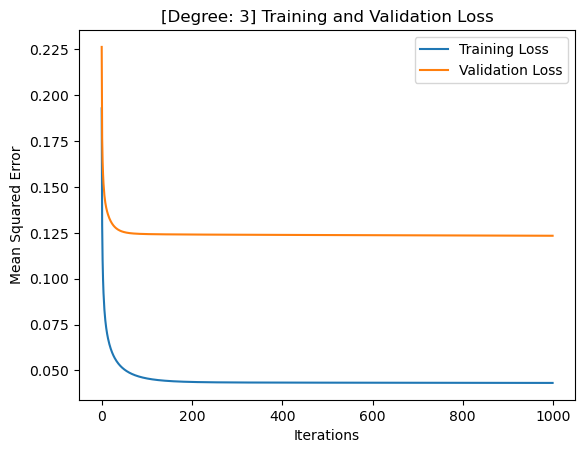

In [64]:
degree = 3

poly = PolynomialFeatures(degree=degree)

# Hyperparameters for SGDRegressor
alpha = 0.001
max_iter = 1000
tol = 1e-3
learning_rate = 'constant'  # Other options: 'optimal', 'invscaling', 'adaptive'

# Initialize model with polynomial features
model = make_pipeline(
    PolynomialFeatures(degree),
    SGDRegressor(alpha=alpha, max_iter=1, tol=None, warm_start=True, random_state=42, learning_rate=learning_rate)
)


# Initialize losses
train_losses = []
val_losses = []

for epoch in range(max_iter):
    model.fit(X_train_transformed, y_train_transformed.ravel())  
    
    # Predict on training and validation sets
    y_train_pred = model.predict(X_train_transformed)
    y_val_pred = model.predict(X_test_transformed)
    
    # Calculate and store mean squared error (MSE) loss
    train_loss = mean_squared_error(y_train_transformed, y_train_pred)
    val_loss = mean_squared_error(y_test_transformed, y_val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    

# Plot training and validation loss
plt.title('[Degree: 3] Training and Validation Loss')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
# plt.show()


Hyper Parameter Tuning for Poly model Degree 2:

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid without batch_size
param_grid = {
    'n_epochs': [100, 200, 500, 1000],  # Number of epochs
    #'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Learning rates
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'learning_rate_val': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],  # initial learning rate
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))
print(len(param_combinations))

# Function to train model
def train_model(X, y, n_epochs, learning_rate_val, eta0, alpha):
    sdg_model = SGDRegressor(max_iter=n_epochs, learning_rate=learning_rate_val, eta0=eta0, alpha=alpha, random_state=42)
    model = make_pipeline(PolynomialFeatures(degree=2), sdg_model)
    model.fit(X, y)
    return model

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store best model and score
best_score = float('inf')
best_params = None

# Iterate through all parameter combinations
for params in param_combinations:
    n_epochs, alpha, learning_rate_val, eta0 = params
    
    # Perform k-fold cross-validation
    cv_scores = []
    for train_index, val_index in kf.split(happiness):
        X_train_fold, X_val_fold = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
        y_train_fold, y_val_fold = y_train_transformed.iloc[train_index], y_train_transformed.iloc[val_index]
        
        # Train the model
        model = train_model(X_train_fold, y_train_fold, n_epochs, learning_rate_val, eta0, alpha)
        
        # Evaluate the model
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        cv_scores.append(mse)
    
    # Calculate average MSE across all folds
    avg_mse = np.mean(cv_scores)
    
    # Update best model if current model performs better
    if avg_mse < best_score:
        best_score = avg_mse
        best_params = {
            'n_epochs': n_epochs,
            'learning_rate': learning_rate_val,
            'alpha': alpha,
            'eta0' : eta0
        }

# Print results
print("Best model parameters for Poly Model with degree 2")
print("Best parameters:", best_params)
print("Best MSE:", best_score)


Hyper Parameter Tuning for Poly model Degree 3:

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import itertools
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid without batch_size
param_grid = {
    'n_epochs': [50, 100, 200, 500, 1000, 2000, 5000],  # Number of epochs
    #'learning_rate': [0.001, 0.01, 0.1, 0.5, 1],  # Learning rates
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],  # Regularization strength
    'learning_rate_val': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1],  # initial learning rate
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(*param_grid.values()))
#print(param_combinations)

# Function to train model
def train_model(X, y, n_epochs, learning_rate_val, eta0, alpha):
    sdg_model = SGDRegressor(max_iter=n_epochs, learning_rate=learning_rate_val, eta0=eta0, alpha=alpha, random_state=42)
    model = make_pipeline(PolynomialFeatures(degree=3), sdg_model)
    model.fit(X, y)
    return model

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store best model and score
best_score = float('inf')
best_params = None

# Iterate through all parameter combinations
for params in param_combinations:
    n_epochs, alpha, learning_rate_val, eta0 = params
    
    # Perform k-fold cross-validation
    cv_scores = []
    for train_index, val_index in kf.split(happiness):
        X_train_fold, X_val_fold = X_train_transformed.iloc[train_index], X_train_transformed.iloc[val_index]
        y_train_fold, y_val_fold = y_train_transformed.iloc[train_index], y_train_transformed.iloc[val_index]
        
        # Train the model
        model = train_model(X_train_fold, y_train_fold, n_epochs, learning_rate_val, eta0, alpha)
        
        # Evaluate the model
        y_pred = model.predict(X_val_fold)
        mse = mean_squared_error(y_val_fold, y_pred)
        cv_scores.append(mse)
    
    # Calculate average MSE across all folds
    avg_mse = np.mean(cv_scores)
    
    # Update best model if current model performs better
    if avg_mse < best_score:
        best_score = avg_mse
        best_params = {
            'n_epochs': n_epochs,
            'learning_rate': learning_rate_val,
            'alpha': alpha,
            'eta0' : eta0
        }

# Print results
print("Best model parameters for Poly Model with degree 3")
print("Best parameters:", best_params)
print("Best MSE:", best_score)


# Summary of Linear and Polynomial Regression Performance on the Happiness Dataset

## Dataset Overview
- The dataset includes features related to **social factors**, **life expectancy**, and **emotional well-being**.
- The target variable, **Life Ladder**, represents subjective well-being or happiness.

---

## Model Explanation
- A **linear regression model** was applied to predict the happiness score (Life Ladder) based on input features.

---

## Feature Scaling
- To ensure all features are on a similar scale (since they have different units), **MinMaxScaler** was applied to normalize the continuous data while **OneHotEncoder** was applied for categorical columns.
- This ensures that features like **Log GDP per capita** and **Generosity** are comparable in magnitude, improving the model's performance.

---

## Model Training and Evaluation
- The dataset was split into:
  - **Training set (75%)** 
  - **Test set (25%)**.
- The model was trained using the training set, and its performance was evaluated on both training and test sets using **Mean Squared Error (MSE)**.
  - **MSE** measures the average squared difference between actual happiness scores and predicted values.

### Performance Results for Linear Model
- **Train RMSE**: `0.3389`
- **Test RMSE**: `0.3806`
- **Observation**: Potential overfitting

---

### Polynomial Regression
- By including higher-degree terms, the model captures non-linear relationships in the data, resulting in better fit but with the risk of overfitting.

#### Results:
- **For Degree 3**:
  - **Mean CV MSE**: `0.2927`
  - **Validation MSE**: `2.7216`

- **For Degree 2**:
  - **Mean CV MSE**: `2.0599`
  - **Validation MSE**: `5.8118`

---

## Ridge, Lasso, and Elastic Net
- These regularized models were used to reduce overfitting by penalizing large coefficients.
  - **Ridge Regression**: Adds a penalty proportional to the square of the magnitude of the coefficients.
  - **Lasso Regression**: Adds a penalty proportional to the absolute value of the coefficients, allowing feature selection by shrinking some coefficients to zero.
  - **Elastic Net**: Combines both Ridge and Lasso penalties to balance the benefits of both methods.
  
- **Multiple alpha values** were tested to find the optimal level of regularization for each model.

---

## Hyperparameter Tuning
- **For Linear Model**:
  - **Best parameters**: `{'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.001, 'eta0': 0.1}`

- **For Polynomial Model**:
  - **Degree 3** and **Degree 2**: 
      - **Best parameters**: `{'n_epochs': 100, 'learning_rate': 'adaptive', 'alpha': 0.001, 'eta0': 0.1}`
---

## Observations
- **Overfitting/Underfitting**:
  - The model shows potential overfitting for both linear and polynomial approaches.

---

## Conclusion
The linear regression model provides a good starting point for predicting happiness scores, capturing the linear relationships between factors like **wealth**, **health**, and **freedom**. However, due to the potential presence of non-linear interactions in the data, more advanced models like **polynomial regression** could further improve prediction accuracy.
